In [1]:
import numpy as np

In [6]:
a = np.poly1d([1, 1])
b = np.poly1d([1, -1])

In [7]:
# 결과값을 보면 [1, 1] = (x + 1)  // [ 1, -1] = (x - 1)
a, b

(poly1d([1, 1]), poly1d([ 1, -1]))

In [8]:
# 결과값을 보면 (x + 1)(x - 1) = (x^2 + 0*x - 1)
# 즉 각 항의 계수를 적은 것 
a*b

poly1d([ 1,  0, -1])

In [9]:
np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5,-6 ])**2

poly1d([ 38, -94,  62])

In [10]:
# 미분 기능 
!pip install sympy

In [11]:
import sympy as sym

th = sym.Symbol('th') # 세타 
diff_th = sym.diff(38*th**2 - 94*th + 62, th) # 세타에 대해서 미분(diff)

diff_th

76*th - 94

### Cost Function : 에러를 표현하는 도구 

##### 예제 - Boston 집값 예측 

In [12]:
from sklearn.datasets import load_boston

boston =  load_boston()

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [13]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
[each for each in boston.feature_names]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [16]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd['PRICE'] = boston.target

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Price에 대한 histogram
import plotly.express as px

fig = px.histogram(boston_pd, x="PRICE")
fig.show()

In [19]:
# 각 특성별 상관계수 확인 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


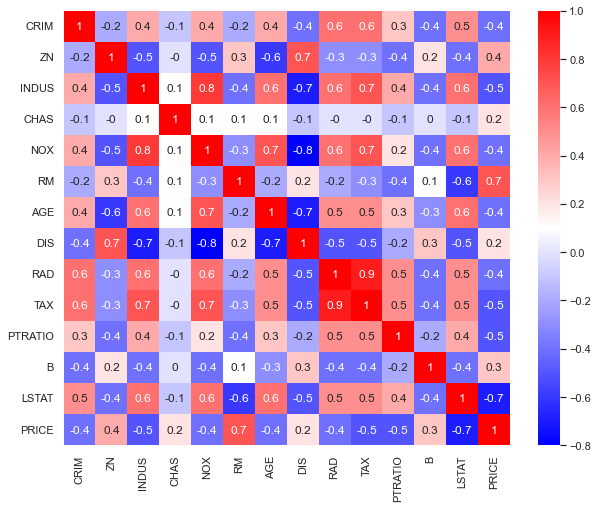

In [20]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

- price에 대해서 대부분의 특성이 높은 상관관계를 가지고 있다. 

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

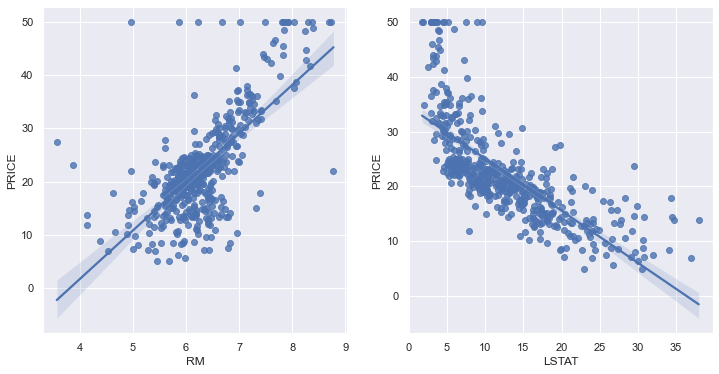

In [23]:
# y축에 price를 두고 x축에 RM, LSTAT의 특성을 두고 자세히 비교 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=ax[1])



- 저소득층 인구가 낮을 수록, 방의 개수가 많을 수록 집값이 높아진다. 

-  하위계층(LSTAT)이 집값과 상관관계가 있어보이지만 집값을 예측하는 모델을 개발하는데 있어서 필요한 특성인가? 단순히 소득이 적은 사람들끼리 모여살아서 집값이 낮게 보이는 것은 아닌지 의심할 필요가 있다.

In [25]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [26]:
# LinearRegression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
# 모델 평가는 RMS

import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.642806069019824
RMSE of Test Data :  4.931352584146711


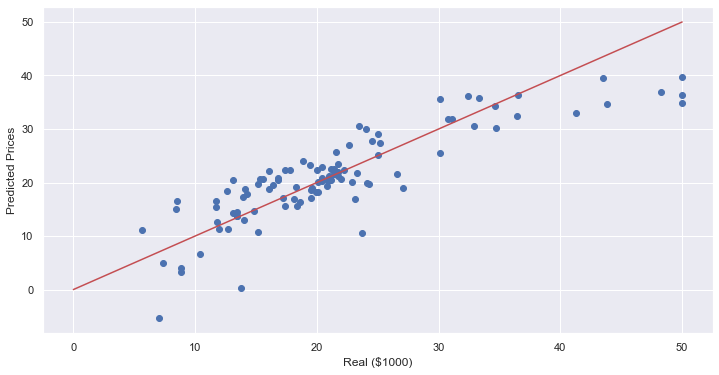

In [28]:
# 성능 확인 
plt.scatter(y_test, pred_test) #참값과 예측값 
plt.xlabel("Real ($1000)")
plt.ylabel("Predicted Prices")
plt.plot([0, 50], [0, 50], 'r')
plt.show();

In [29]:
# LSTAT를 제외하고 진행 
X = boston_pd.drop(['PRICE', 'LSTAT'], axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)


RMSE of Train Data :  5.165137874244864
RMSE of Test Data :  5.295595032597162


- LSTAT를 제외했더니 RMSE가 올라갔다. 성능이 나빠졌지만 여기서 LSTAT를 빼야한다고 쉽게 판단할 수 없다. 

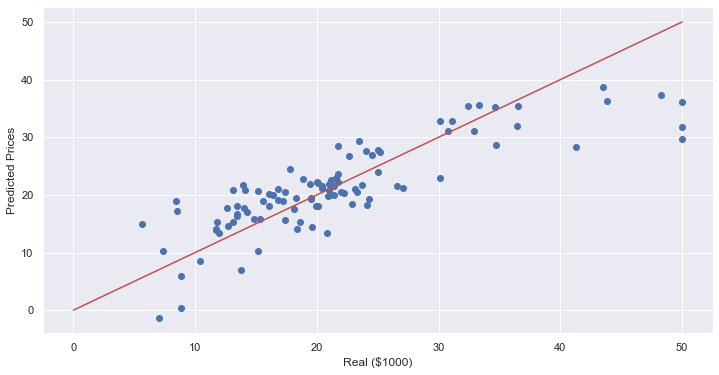

In [30]:
plt.scatter(y_test, pred_test) 
plt.xlabel("Real ($1000)")
plt.ylabel("Predicted Prices")
plt.plot([0, 50], [0, 50], 'r')
plt.show();